In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Comcast_telecom_complaints_data.csv')
df.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


### Checking for null values in dataset

In [3]:
df.isnull().values.any()

False

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
len(df['Status'])

2224

In [7]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [8]:
# df.groupby('State')['Ticket #'].count().sort_values(ascending=False)

### States which have complaints in open status

In [9]:
df.loc[df['Status']=='Open'].groupby('State')['Status'].count().sort_values(ascending=False).head(10)

State
California      47
Florida         35
Georgia         35
Tennessee       33
Illinois        23
Michigan        18
Washington      18
Texas           18
New Jersey      17
Pennsylvania    14
Name: Status, dtype: int64

In [10]:
# df.groupby('State')['Status'].count().sort_values(ascending=False)

### Checking Status of Complaints

In [11]:
df.Status.value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [12]:
# pd.crosstab(df.State, df.Status)

### Making new variable for Open and Pending complaints as Open, and Closed and Solved as Closed

In [13]:
df['new_Status']=df['Status'].map({'Open':'Open', 'Solved':'Closed','Closed':'Closed', 'Pending':'Open'})

In [42]:
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,new_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Closed
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,Closed
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Closed


In [14]:
df['new_Status']

0       Closed
1       Closed
2       Closed
3         Open
4       Closed
         ...  
2219    Closed
2220    Closed
2221    Closed
2222    Closed
2223      Open
Name: new_Status, Length: 2224, dtype: object

### Top 10 States which has maximum of Open and Pending Complaints

In [15]:
X=df.loc[df['new_Status']=='Open'].groupby('State')['Status'].count().sort_values(ascending=False).head(10)

In [16]:
X

State
Georgia         80
California      61
Tennessee       47
Florida         39
Illinois        29
Michigan        23
Washington      23
Colorado        22
Texas           22
Pennsylvania    20
Name: Status, dtype: int64

### Visualisation of Top 10 States which has maximum of Open and Pending Complaints

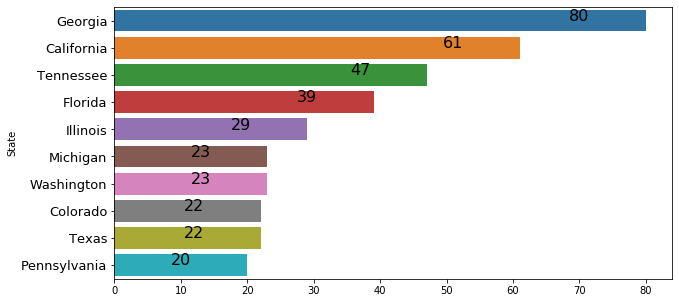

In [17]:
plt.figure(figsize=(10,5))
g = sns.barplot(y = X.index, x = X.values)
g.set_yticklabels(g.get_yticklabels(), fontsize = 13)
for i in range(10):
    value = X[i]
    g.text(x = value - 10, y = i, s = value, color = 'black', ha = 'center', fontsize = 16)
plt.show()

### Total Complaint Registered per State

In [18]:
a= df.groupby('State')['Status'].count()

### Total Complaint Closed per State

In [19]:
b= df.loc[df['new_Status']=='Closed'].groupby('State')['new_Status'].count()

### Percentage of Complaints not closed yet per State

In [20]:
c=(a-b)*100/a

### Sorting in desecnding order

In [21]:
d=c.sort_values(ascending=False).head(10)
d

State
Kansas           50.000000
Kentucky         42.857143
Mississippi      41.025641
Maine            40.000000
Alabama          34.615385
New Hampshire    33.333333
Vermont          33.333333
Delaware         33.333333
Tennessee        32.867133
Texas            30.985915
dtype: float64

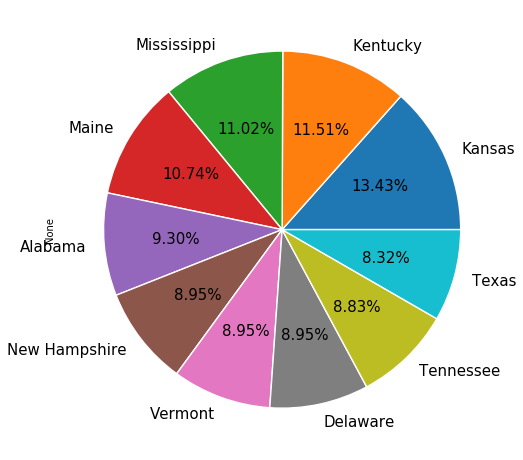

In [22]:
plt.figure(figsize = (8,12))
d.plot.pie(radius = 1,
           fontsize = 15,
           wedgeprops = {'edgecolor' : 'white', 'linewidth':1.4, 'linestyle':'solid'},
           autopct = '%1.2f%%')

In [23]:
df.State.describe()

count        2224
unique         43
top       Georgia
freq          288
Name: State, dtype: object

In [24]:
#top_5 = df.Status.value_counts()[:5].index
#top_5

In [25]:
#df[(df.Status.isin(top_5))]

### State which has the maximum complaints

In [26]:
Max_Complaint_State=df.groupby('State')['Status'].count().sort_values(ascending=False).head(5)

In [27]:
Max_Complaint_State

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
Name: Status, dtype: int64

### Visualisation of Top 5 States which has maximum Complaints registered

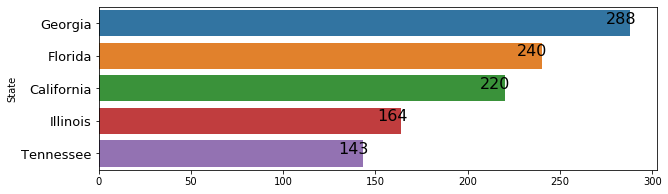

In [28]:
plt.figure(figsize=(10,3))
g = sns.barplot(y = Max_Complaint_State.index, x = Max_Complaint_State.values)
g.set_yticklabels(g.get_yticklabels(), fontsize = 13)
for i in range(5):
    value = Max_Complaint_State[i]
    g.text(x = value - 5, y = i, s = value, color = 'black', ha = 'center', fontsize = 16)
plt.show()

### Percentage of complaints resolved till date, which were received through the Internet and customer care calls.


#### Total Complaint received via internet

In [29]:
total_complaint= df[df['Received Via']=='Internet'].count()
total_complaint['Received Via']

1105

#### Total complaint received via internet and closed

In [30]:
total_closed_complaint= df[(df['Received Via']=='Internet') & (df['new_Status']=='Closed')].count()
total_closed_complaint['Received Via']

843

#### Percentage of complaint closed which received via internet

In [31]:
Per_compliant_closed= total_closed_complaint['Status']*100/total_complaint['Status']
Per_compliant_closed

76.289592760181

#### Total Complaint received via customer call

In [32]:
customer_call= df[df['Received Via']=='Customer Care Call'].count()
customer_call['Received Via']

1119

#### Total complaint received via customer care call  and closed

In [33]:
complaint_closed= df[(df['Received Via']=='Customer Care Call') & (df['new_Status']=='Closed')].count()
complaint_closed['Received Via']

864

#### Percentage of complaint closed which received via customer call

In [34]:
per_complaint_closed= complaint_closed*100/customer_call
per_complaint_closed['Status']

77.21179624664879

### Total complaint received via both means

In [35]:
Total_complaint_received= df['Status'].count()
Total_complaint_received

2224

In [36]:
Total_complaint_closed= df[df['new_Status']=='Closed'].count()
Total_complaint_closed['new_Status']

1707

### Percentage of Total Complaint closed received via both means

In [37]:
Total_complaint_closed['new_Status']*100/Total_complaint_received

76.75359712230215

### Visulization of complaints received by States

In [38]:
df1=pd.crosstab(df.State, df.Status)
df1

Status,Closed,Open,Pending,Solved
State,,,,
Alabama,8,4,5,9
Arizona,6,2,4,8
Arkansas,1,0,0,5
California,72,47,14,87
Colorado,23,12,10,35
Connecticut,3,2,1,6
Delaware,2,3,1,6
District Of Columbia,5,1,1,9
District of Columbia,0,0,0,1


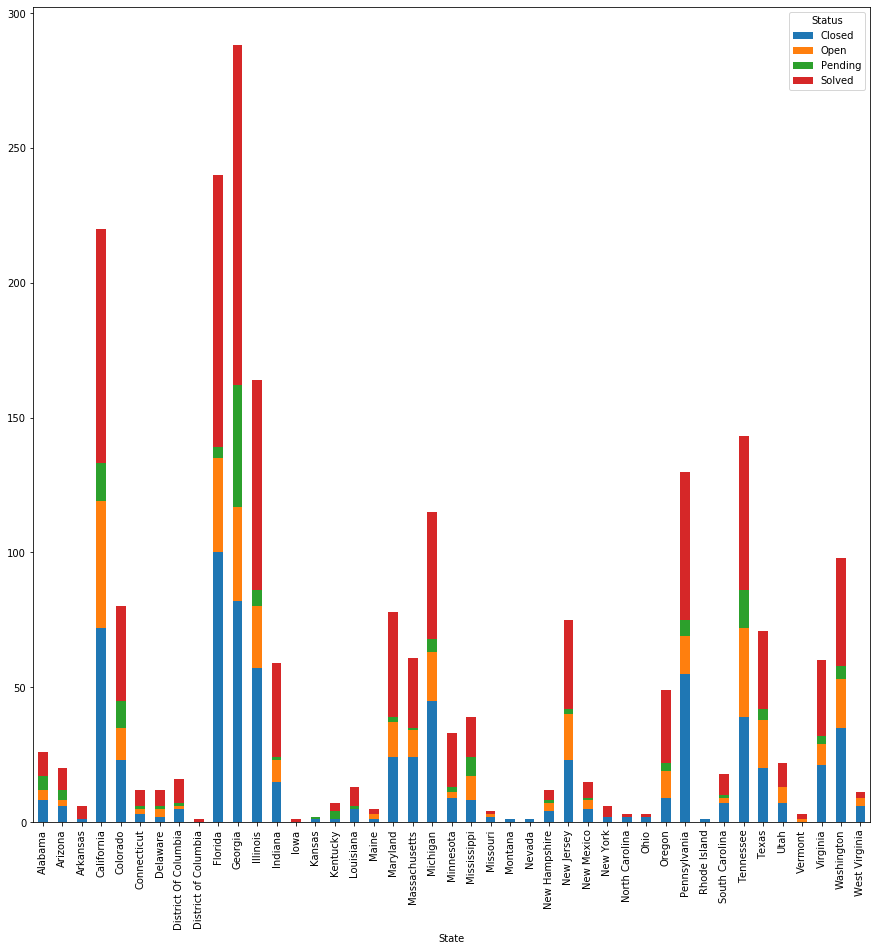

In [39]:
df1.plot.bar(figsize = (15,15), stacked = True)
plt.show()

### Day wise status of complaint

In [40]:
df2=pd.crosstab(df.Date_month_year,df.Status)
df2

Status,Closed,Open,Pending,Solved
Date_month_year,,,,
04-Apr-15,12,0,0,0
04-Aug-15,28,0,0,0
04-Dec-15,15,0,0,0
04-Feb-15,26,1,0,0
04-Jan-15,18,0,0,0
...,...,...,...,...
29-May-15,0,6,3,5
30-Apr-15,24,0,0,0
30-Jun-15,1,18,17,17


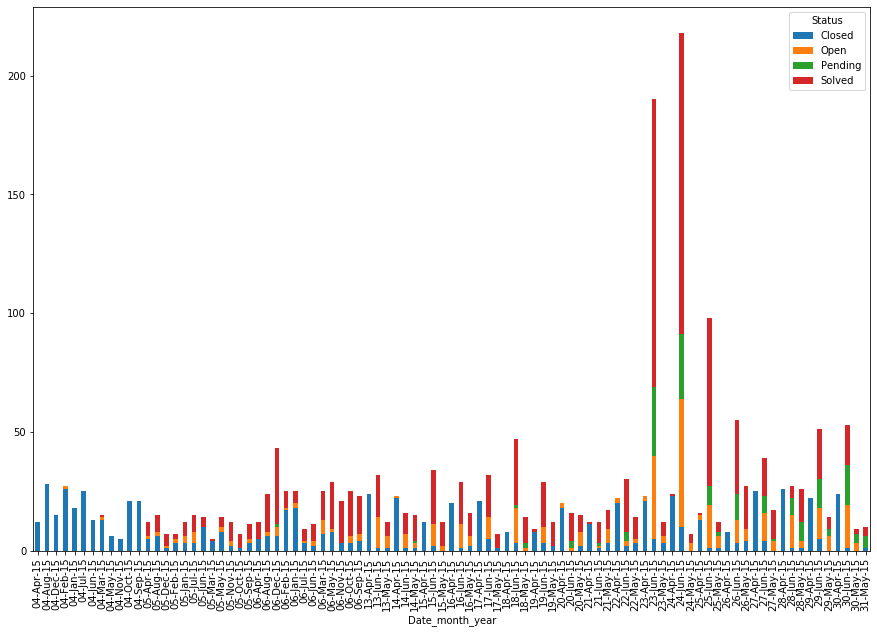

In [41]:
df2.plot.bar(figsize = (15,10), stacked = True)
plt.show()